<a href="https://colab.research.google.com/github/BogachanA/CV_Tirana/blob/main/Test/Tirana_CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

<ipython-input-5-8b8816cbefa4>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC) # visualize image using imshow function
<ipython-input-5-8b8816cbefa4>:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


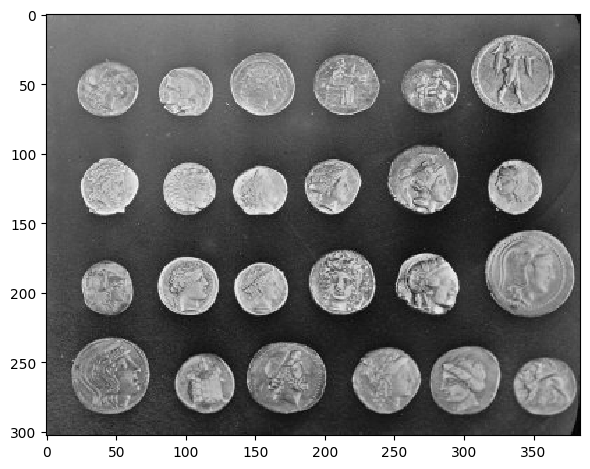

Image size is: (303, 384) 
 The range of grayscale pixels: [ 1 , 252 ]


In [5]:
import skimage as sk # load skimage libraries
IC = sk.data.coins() # load a color image from the skimage built-in dataset
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show()
min_val = IC.min()
max_val = IC.max()
print("Image size is:", str(IC.shape), "\nThe range of grayscale pixels: [", min_val,",",max_val,"]")

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

We see three regions of interest, the high intensity of grayscale pixels with a value peaking around 30-70 represent the background of the image mainly as it is darker in color. The mid value range between possibly 80 until the next peak of the 160 band are mainly the pixels of the coins, the elements of interest in the picture. The last peak (around 160) and beyond represents the shininess of and reflections on the coin speculatively.

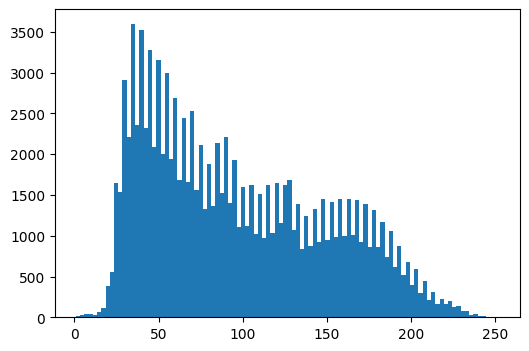

In [6]:
import matplotlib.pyplot as plt

flat_data = IC.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.show()

## 3. Applied noise to the image and use the correct function to erase the noise.

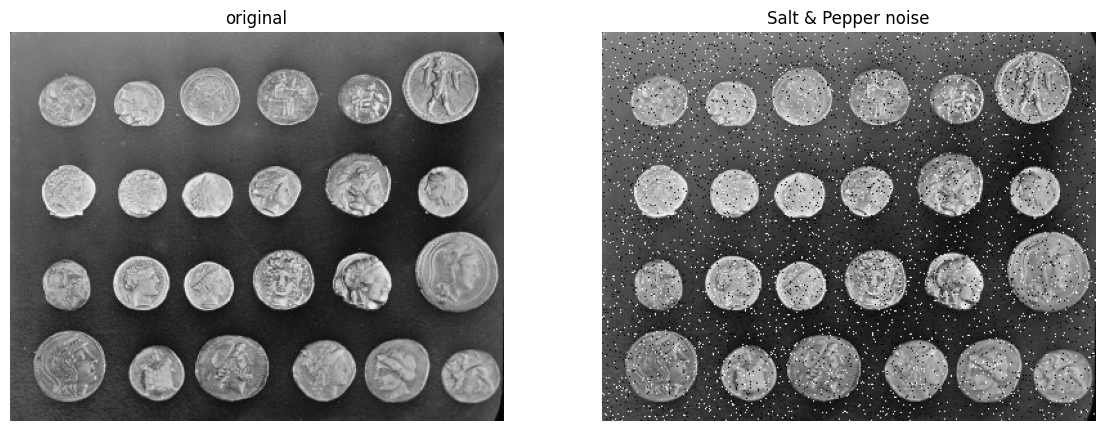

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, util
from skimage import img_as_ubyte

## Noisy image: Add some noise s&p
noise = np.random.random(IC.shape)
noisy = util.random_noise(IC, mode='s&p', amount=0.05)



def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(IC,noisy,'Salt & Pepper noise')
plt.savefig('Noisy.png')

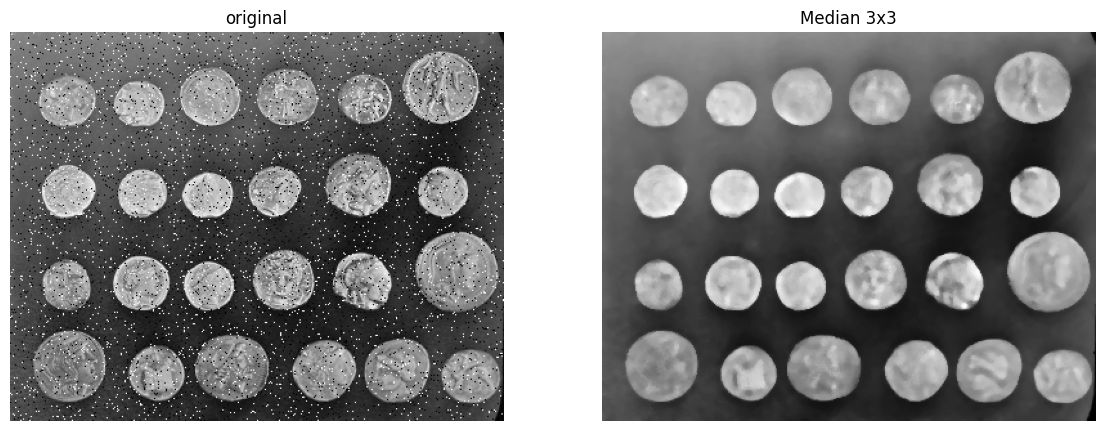

In [9]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy)
sel5 = disk(3) # structuring element disk radius 3 pixels
img_med = median(img, sel5)
plot_comparison(img,img_med,'Median 3x3')


## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

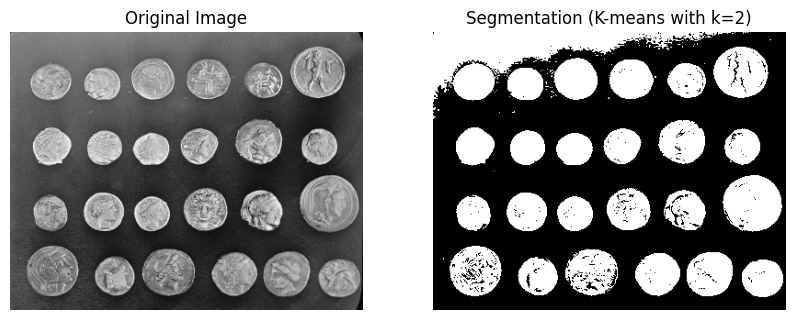

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

v_I = IC.reshape(-1, 1)

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
I_kmeans = np.reshape(v_kmeans,(IC.shape[0],IC.shape[1]))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IC, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

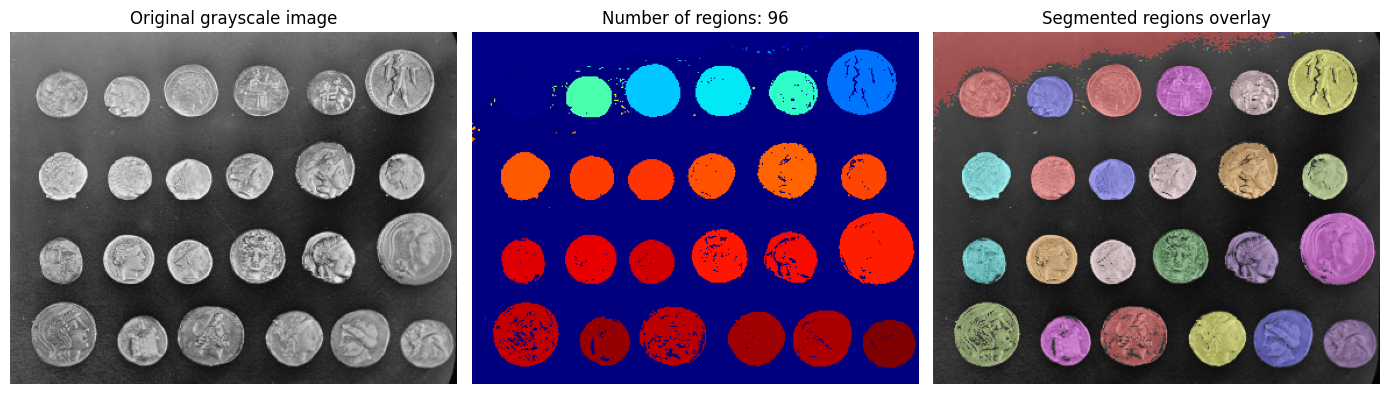

In [27]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IC)
bw = IC > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IC)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IC,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

In [36]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.describe()

,label,area,eccentricity,extent,axis_major_length
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,48.500000,469.968750,0.449723,0.863164,15.758364
std,27.856777,1115.125959,0.424780,0.177581,34.633865
min,1.000000,1.000000,0.000000,0.350000,0.000000
25%,24.750000,1.000000,0.000000,0.746819,0.000000
50%,48.500000,3.000000,0.358859,1.000000,2.000000
75%,72.250000,303.000000,0.973270,1.000000,21.976714
max,96.000000,8792.000000,1.000000,1.000000,292.106573


<Axes: xlabel='axis_major_length', ylabel='area'>

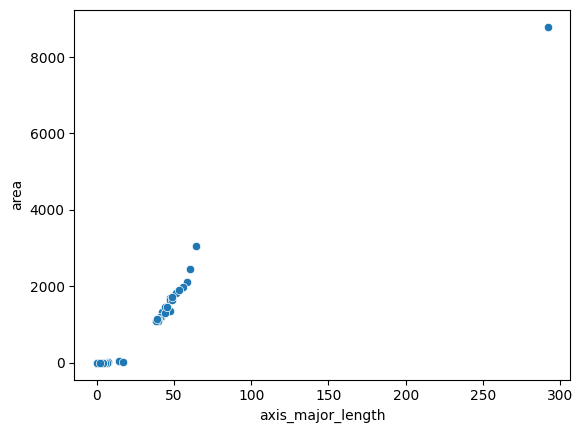

In [31]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [38]:
large_regions = df_features.loc[df_features['area']>=1750]

N_large = large_regions.shape[0]
print('there are {} blobs with an area larger or equal to 1750 pixels'.format(N_large))

there are 7 blobs with an area larger or equal to 1750 pixels


##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

In [39]:

small_regions = df_features.loc[df_features['area']<1750]

labels_small = small_regions['label'].values
print('labels of small blobs: {}'.format(labels_small))
labels_large = large_regions['label'].values
print('labels of large blobs: {}'.format(labels_large))

import numpy as np
mask_small_blobs = np.isin(label_image,labels_small)
mask_large_blobs = np.isin(label_image,labels_large)

labels of small blobs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 78 79 80 81 82 83 85 86 87 88 89 93 94 95 96]
labels of large blobs: [ 1 23 77 84 90 91 92]


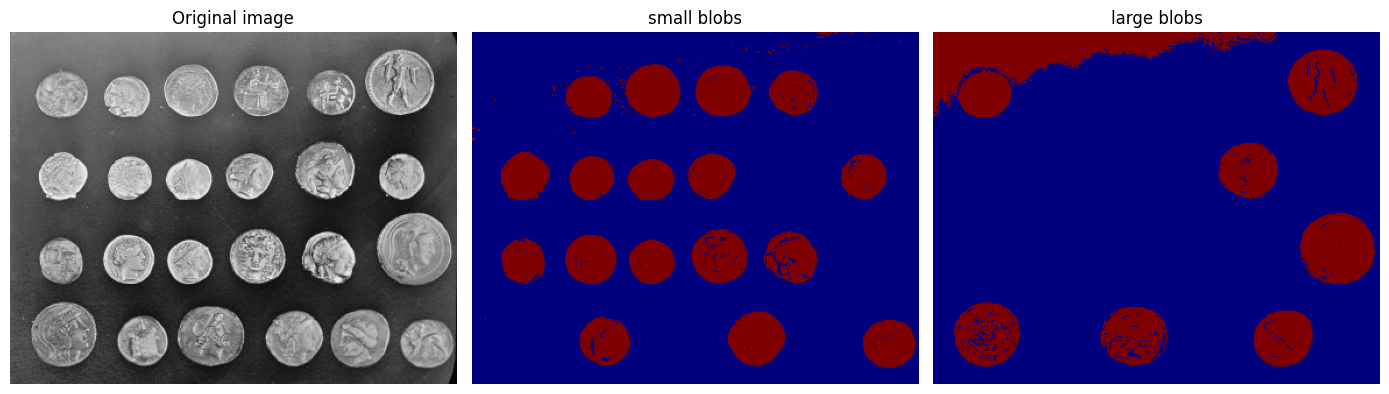

In [40]:
# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IC,cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(mask_small_blobs,cmap=plt.cm.jet)
ax[1].set_title('small blobs') # set figure title
ax[2].imshow(mask_large_blobs,cmap=plt.cm.jet)
ax[2].set_title('large blobs')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

Main steps required to segment an RGB Image:
1. Loading the image
2. Feature Extraction: Shapes and analysis, preparing the image variable for the segmentation process
3. Choosing an algorithm that would perform the segmentation
4. Fitting and predicting labels for the segments
5. Post-processing image and visualizing it (with the labels etc)

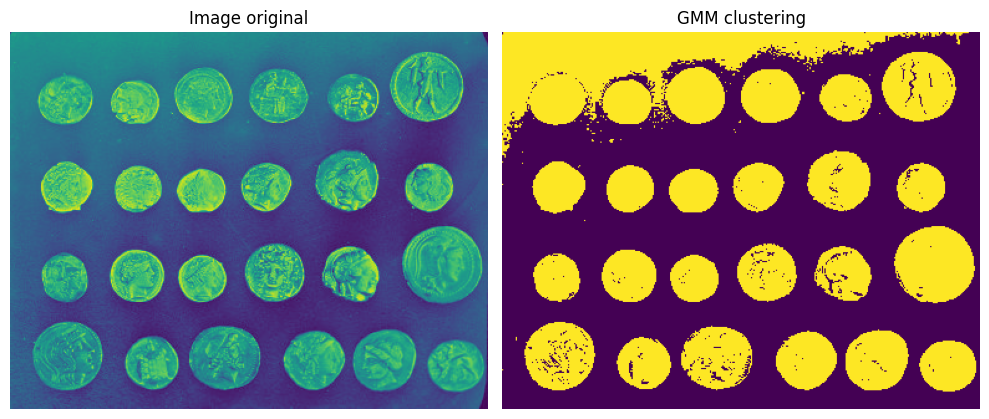

In [52]:
import skimage as sk # load skimage libraries
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

I = sk.data.coins() # load RGM image
v_I = I.reshape(-1, 1) # reshape image as NPIX x NCHANNELS array

gmm = mixture.GaussianMixture(n_components=2).fit(v_I)
v_gmm = gmm.fit_predict(v_I)
I_gmm = np.reshape(v_gmm,(I.shape[0],I.shape[1]))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I)
ax0.set_title('Image original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

In [59]:
from skimage import data, measure
from skimage.morphology import remove_small_objects, closing, disk
from skimage.color import label2rgb
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Determine which GMM component corresponds to coins (higher mean intensity)
centers = gmm.means_.flatten()
print(centers)
coin_label = np.argmax(centers)

# Create binary mask for coins
mask = (I_gmm == coin_label)

# Label connected components
labeled = measure.label(mask)
num_coins = labeled.max()

print(f"Number of coins detected by GMM segmentation: {num_coins}")

[ 58.90503066 148.67729804]
Number of coins detected by GMM segmentation: 96


If we compare the result between the KNN and the GMM algorithms through same region count used on the same image (coins) we see that especially for larger chosen regions, the regions can "stretch" a little further than the result of KNN. As GMM uses a gaussian probabilistic approach, it doesn't directly classify regions based on feature distances but probabilities for each cluster. This, while being closer to actual real world data nature, can have a deficiency as seen from the examples, in GMM result there are more random pixels that are considered as "coins" looking like random noise around bigger region.

In this case we see that both major clusters without cleanup give a count of 96, which means both algorithms, despite their small differences in pixel assignment, ends up labeling similar regions as connected.

## 10. Extract the main texture features of this image

In [53]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import img_as_ubyte

props = regionprops(label_image, intensity_image=IC)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = IC[minr:maxr, minc:maxc]

    Iu8 = img_as_ubyte(I)
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,254.474130,7.573417,0.310996,0.033827,0.890400
1,7.050000,1.716667,0.551310,0.206828,0.408660
2,2.461538,0.974359,0.642464,0.270145,0.887256
3,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
91,329.792092,11.480017,0.121271,0.022586,0.905886
92,428.130762,13.391401,0.106752,0.022048,0.920394
93,740.002769,17.286268,0.094242,0.021456,0.867842
94,0.000000,0.000000,0.000000,0.000000,1.000000


## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)

It is one of the courses I've had that was easier to follow as the resources you have provided in a very coherent form and made it so much easier to perform self-research on the relevant topics. Having the codes in a python notebook format with clear distinctions and flow allowed us to experiment on the parts much easily. Overall I am very satisfied with the teaching methods and how the course is conveyed. It was one of the most well-structured courses we had this semester. Thanks a lot for everything.
The best part of the course was when you have shared in detail your research and how the potential applications of the methods we are learning are concretized in real world scenarios, with your medical imaging researches and presentations. They were very insightful.
And I am so sorry for your loss once again. Wish to cross paths in the future hopefully.